<a href="https://colab.research.google.com/github/AkashSalmuthe/Python-Noteboks/blob/main/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Numerica Features df

df2 = df[['survived','pclass','age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [7]:
df3 = df2.fillna(df2.mean())


In [10]:
X = df3.drop('survived',axis=1)
y = df3['survived']


print(X.shape)
print(y.shape)

(891, 3)
(891,)


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

print('Shape Of X_train',X_train.shape)
print('Shape Of X_test',X_test.shape)
print('Shape Of y_train',y_train.shape)
print('Shape Of y_test',y_test.shape)

Shape Of X_train (712, 3)
Shape Of X_test (179, 3)
Shape Of y_train (712,)
Shape Of y_test (179,)


In [13]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [14]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [22]:
X_train_sc= sc.transform(X_train )
X_test_sc = sc.transform(X_test )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [23]:
X_train_sc

array([[-1.75837972, -2.30776312, -1.1096893 ],
       [-1.75837972, -2.12113234, -1.1096893 ],
       [-1.75837972, -2.38478535, -1.1096893 ],
       ...,
       [-1.75837972, -2.16556824,  3.61939826],
       [-1.75837972, -2.27399706,  0.46667322],
       [-1.75837972, -2.28110158, -1.1096893 ]])

In [34]:
X_train_sc = pd.DataFrame(X_train_sc,columns=['pclass','age','parch'])
X_test_sc = pd.DataFrame(X_test_sc,columns=['pclass','age','parch'])

In [35]:
X_train_sc.describe

<bound method NDFrame.describe of      pclass       age  parch
0       1.0  0.334089    0.0
1       1.0  0.780391    0.0
2       1.0  0.149901    0.0
3       1.0  0.249079    0.0
4       1.0  0.414836    0.4
..      ...       ...    ...
707     1.0  0.546614    0.0
708     1.0  0.414836    0.2
709     1.0  0.674129    0.6
710     1.0  0.414836    0.2
711     1.0  0.397846    0.0

[712 rows x 3 columns]>

In [26]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [30]:
X_train_mmc= mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [31]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [32]:
X_train_mmc = pd.DataFrame(X_train_mmc,columns=['pclass','age','parch'])
X_test_mmc = pd.DataFrame(X_test_mmc,columns=['pclass','age','parch'])

In [33]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


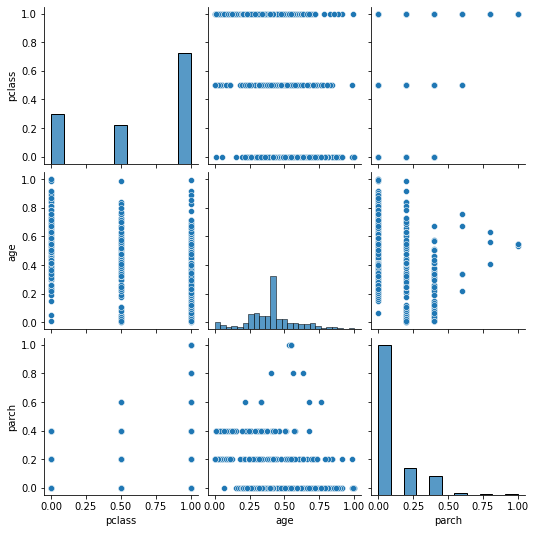

In [37]:
sns.pairplot(X_train_sc)

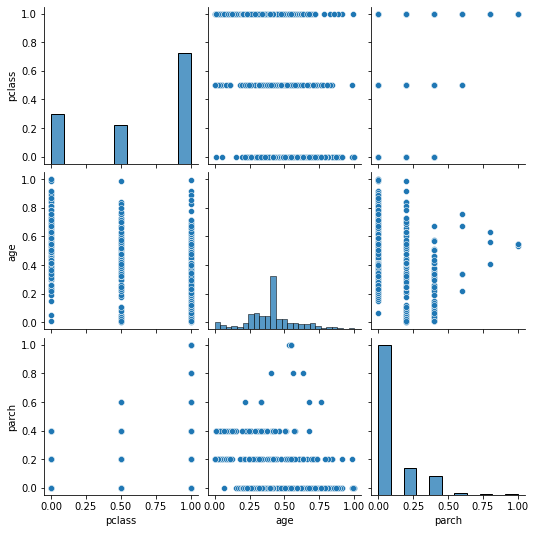

In [38]:
sns.pairplot(X_train_mmc)